Importing libraries

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import random
from random import Random
from numpy import log,dot,e,shape
import math
data=pd.read_csv('/content/gdrive/MyDrive/Dsata Set for Assignment 1.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Dropping id and diagnosis from X and initialising Y as the output variable

In [3]:
from random import Random
Random(14).shuffle(data.values)
print(data.shape)
# data = data.dropna()
print(data.shape)
y=data.diagnosis
x=data.drop('id',axis=1)
x=x.drop('diagnosis',axis=1)

(569, 32)
(569, 32)


Splitting into training and testing

In [4]:
x_train=x.iloc[0:382].values
x_test=x.iloc[382:].values
y_train=y.iloc[0:382].values
y_test=y.iloc[382:].values
y_binaryTrain=np.array([1.0 if i == 'M' else 0.0 for i in y_train])
y_binaryTest=np.array([1.0 if i == 'M' else 0.0 for i in y_test])

Feature Engineering (Normalising the data)

In [5]:
def standardize_data(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    standardized_data = (data - mean) / std
    return standardized_data

x_test = standardize_data(x_test)
x_train = standardize_data(x_train)

mean1 = np.nanmean(x_train)
mean2 = np.nanmean(x_test)
# Replace NaN values with mean
x_train[np.isnan(x_train)] = mean1
x_test[np.isnan(x_test)] = mean2

Implementing logistic regression

In [8]:
def sigmoid(z):
    # Compute the sigmoid function
    return 1 / (1 + np.exp(-z))

def predict(X, theta, B):
    # Make predictions using the logistic regression model
    return sigmoid(np.dot(X, theta)+B)

def compute_loss(X, y, w, b):
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return loss

def sgd(X, y, alpha, num_epochs):
    # Implement stochastic gradient descent for logistic regression

    n_sample, n_features = X.shape
    w_i = np.zeros(n_features,dtype=np.float32)
    w = w_i
    B=0.0
    b = B
    cost_list = np.zeros(num_epochs)
    for epoch in range(num_epochs):
        for i in range(n_sample):
            # Select a random training example
            random_index = np.random.randint(n_sample)
            xi = X[random_index, :].reshape(1, -1)
            yi = y[random_index]

            # Compute the predicted probability and loss for the current example
            hi = predict(xi, w, B)
            loss = -(yi * np.log(hi) + (1 - yi) * np.log(1 - hi))

            # Compute the gradient of the loss with respect to the weights
            dW = xi.T.dot(hi - yi)
            dB = hi-yi
            # Update the weights
            w -= alpha * dW
            b -= alpha * dB 
            loss = compute_loss(X, y, w, b)
            cost_list[epoch]=loss
            # if (epoch%(num_epochs/10) == 0):
            #   print("cost after ", i, "iteration is : ", loss) 

    return w, b, cost_list

In [9]:
alpha = 0.0001
num_epochs = 100
W,B, cost_list = sgd(x_train,y_binaryTrain, alpha, num_epochs)

In [14]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(X, W) + B
    A = sigmoid(Z)
    
    A = A > 0.4
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[0])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")
accuracy(x_test,y_binaryTest,W,B)

Accuracy of the model is :  85.03 %


Cost vs iterations

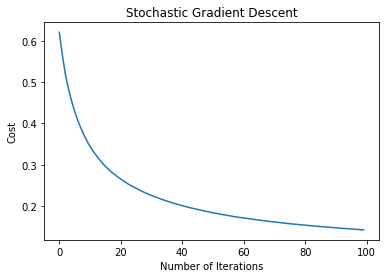

In [15]:
plt.plot(range(num_epochs), cost_list)
plt.title('Stochastic Gradient Descent')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()